### Access libraries that will be used

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [5]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv(r'p:\\stats.csv')
magic.head()

,FirstName,LastName,Age,Pos,Date,Tm,H/A,Opp,Outcome,GmSc,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
0,Nikola,Vucevic,30-084,C,1/16/2021,ORL,@,BRK,L,33.1,...,4,6,10,7,5,0,4,4,34,18.5
1,Nikola,Vucevic,30-066,C,12/29/2020,ORL,@,OKC,W,27.9,...,3,7,10,5,1,0,1,0,28,13.7
2,Nikola,Vucevic,30-077,C,1/9/2021,ORL,@,DAL,L,26.7,...,3,12,15,2,2,0,0,3,30,14.5
3,Nikola,Vucevic,30-070,C,1/2/2021,ORL,NaN,OKC,L,25.2,...,2,11,13,2,0,0,1,1,30,13.0
4,Nikola,Vucevic,30-072,C,1/4/2021,ORL,NaN,CLE,W,24.1,...,2,6,8,2,2,3,0,0,23,18.8


In [6]:
magic.tail()

,FirstName,LastName,Age,Pos,Date,Tm,H/A,Opp,Outcome,GmSc,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
157,Mohamed,Bamba,22-239,C,1/6/2021,ORL,NaN,CLE,W,-1.9,...,0,1,1,0,0,0,0,2,0,-37.7
158,Michael,Carter-Williams,29-086,G,1/4/2021,ORL,NaN,CLE,W,-2.1,...,1,0,1,3,0,1,2,2,0,-11.8
159,Gary,Clark,26-053,F,1/8/2021,ORL,@,HOU,L,-2.6,...,0,4,4,0,0,1,2,1,0,-15.8
160,Gary,Clark,26-063,F,1/18/2021,ORL,@,NYK,L,-2.6,...,0,2,2,0,0,1,0,1,0,-15.3
161,Dwayne,Bacon,25-141,G,1/18/2021,ORL,@,NYK,L,-4.5,...,0,1,1,1,0,0,1,5,2,-18.3


### Display data using histogram, swarmplot, and boxplot

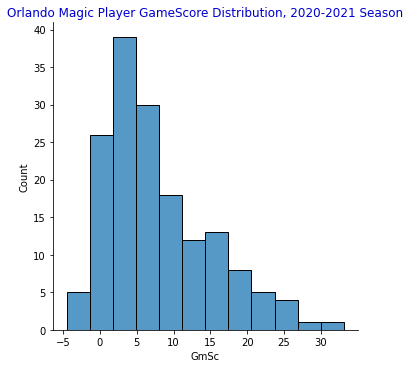

In [7]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

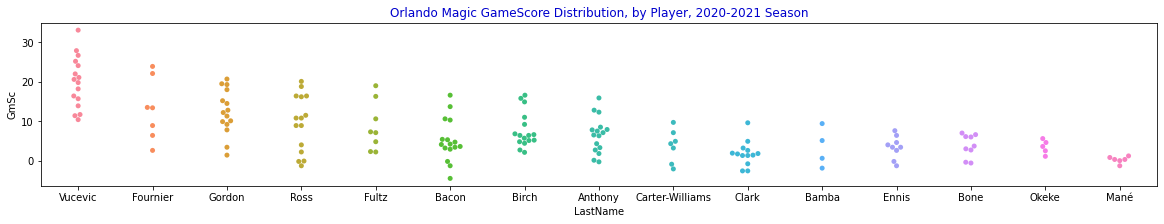

In [8]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

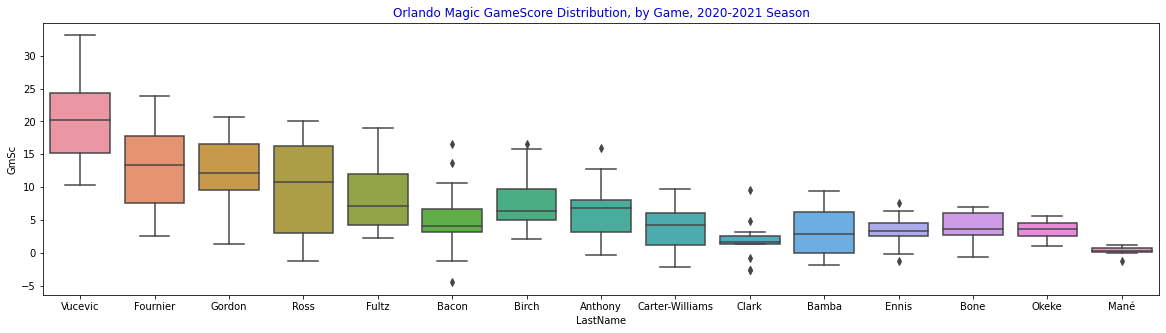

In [9]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


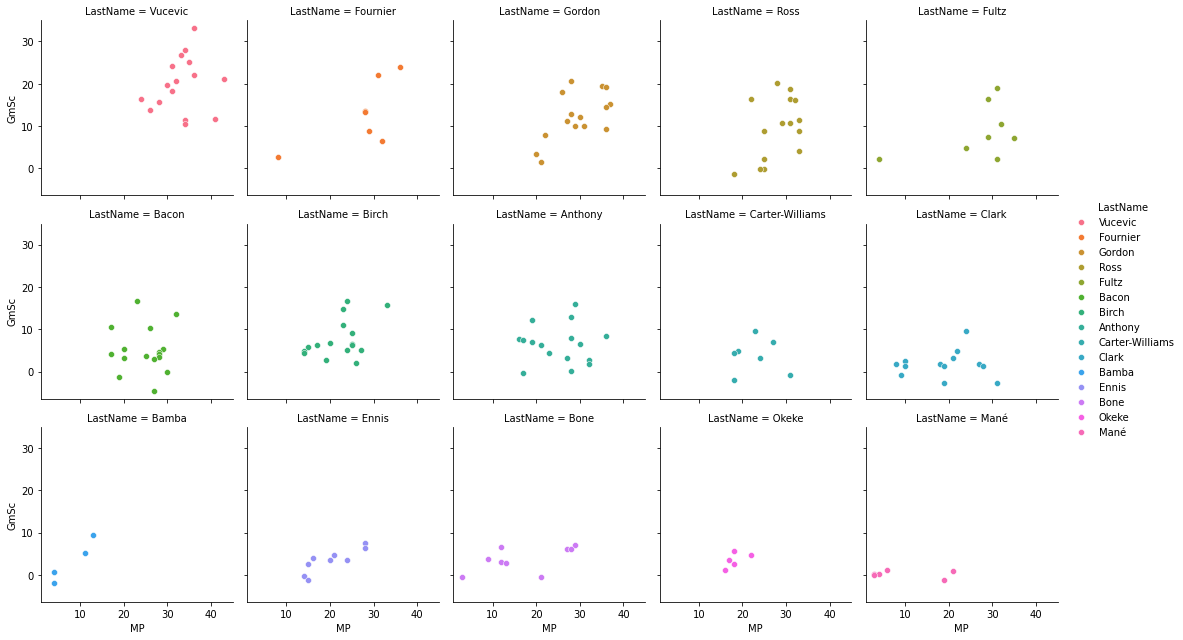

In [10]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

K:\Users\adria\Downloads\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


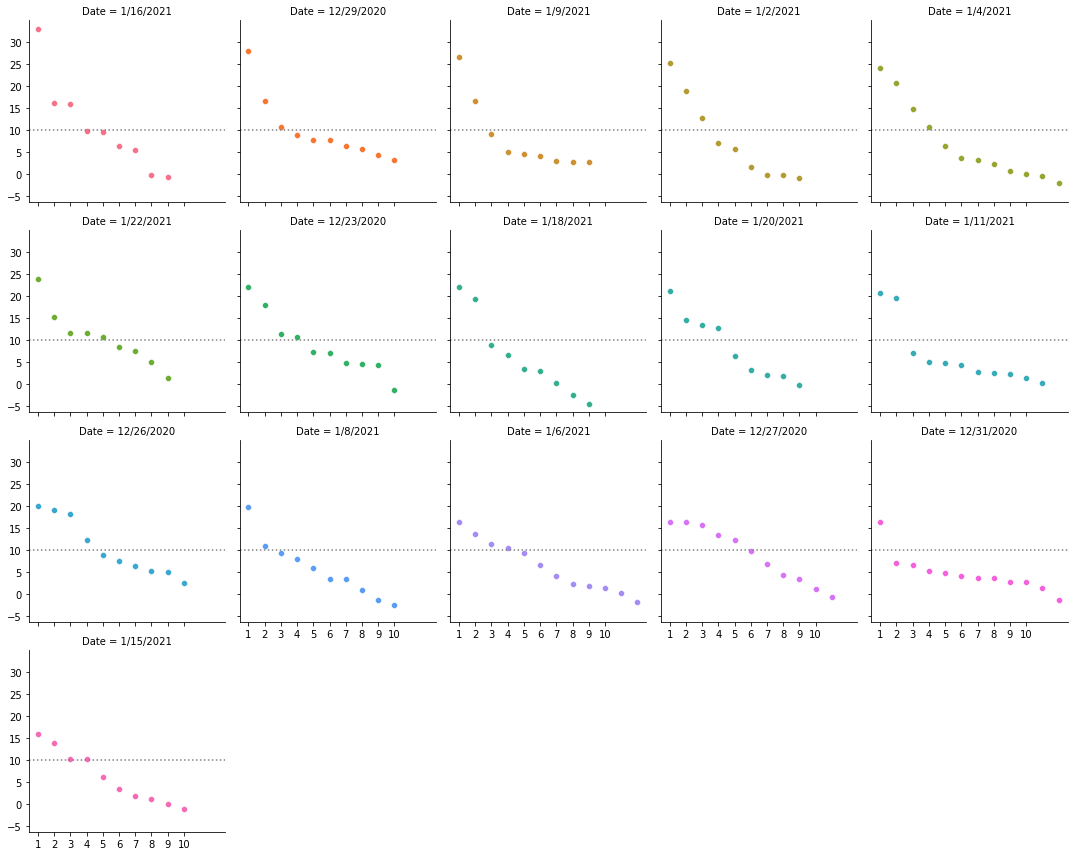

In [11]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Calculate each player's average gamescore, standard dev., and quartiles

In [12]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                        
                count       mean       std   min     25%    50%     75%   max
LastName                                                                     
Anthony          16.0   6.531250  4.542645  -0.3   3.150   6.80   8.050  15.9
Bacon            16.0   5.125000  5.418425  -4.5   3.125   4.15   6.625  16.6
Bamba             4.0   3.300000  4.992661  -1.9  -0.025   2.85   6.175   9.4
Birch            16.0   7.731250  4.530301   2.1   5.025   6.40   9.650  16.6
Bone              9.0   3.788889  2.895447  -0.6   2.700   3.70   6.100   7.0
Carter-Williams   7.0   3.742857  4.171274  -2.1   1.150   4.30   6.000   9.7
Clark            13.0   1.823077  3.151760  -2.6   1.300   1.70   2.600   9.6
Ennis             9.0   3.388889  2.831274  -1.3   2.600   3.40   4.600   7.6
Fournier          7.0  12.971429  7.858692   2.6   7.650  13.40  17.800  23.9
Fultz             8.0   8.700000  6.215189   2.2   4.175   7.20  12.025  19.0
Gordon           15.0  12.353333  5.712376   1.4   9.550  12.20  16.600  20.7
Mané              6.0   0.216667  0.856543  -1.3   0.075   0.30   0.675   1.2
Okeke             5.0   3.480000  1.759830   1.1   2.500   3.60   4.600   5.6
Ross             15.0   9.560000  7.237975  -1.3   3.100  10.80  16.300  20.1
Vucevic          16.0  19.887500  6.506804  10.4  15.250  20.20  24.375  33.1

In [13]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName']].groupby(['LastName'], as_index=True).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc
LastName              
Vucevic          318.2
Gordon           185.3
Ross             143.4
Birch            123.7
Anthony          104.5
Fournier          90.8
Bacon             82.0
Fultz             69.6
Bone              34.1
Ennis             30.5
Carter-Williams   26.2
Clark             23.7
Okeke             17.4
Bamba             13.2
Mané               1.3
